# Assignment-3
By K. Sai Somanath, 18MCMT28

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [89]:
def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False), :]
    print(centroids)
    clusters = np.array([])
    Y = np.full(data.shape[0], -1)
    
    # for _ in range(max_iters):
    while np.array_equal(clusters, Y) is False:
        # print('Iteration:', _, end='\r')
        for i in range(data.shape[0]):
            Y[i] = np.argmin(np.linalg.norm(centroids - data[i], axis=1))
        
        clusters = Y.copy()
        
        for i in range(k):
            var = data[Y == i]
            if var.size:
                centroids[i] = np.mean(var, axis=0)
            
    return np.array([data[clusters == x] for x in range(k)]), centroids, clusters

In [48]:
# Read the data
iris = np.genfromtxt('iris.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3))
pca = PCA(n_components=3)
pca.fit(iris)
X = pca.transform(iris)

In [140]:
cluster, centroids, _ = k_means(X, 3)
centroids

[[-0.25288888  2.82149237 -0.30263978]
 [-2.14681113 -0.36825495 -0.4533013 ]
 [-0.47956492  1.93884066  1.29650752]]


array([[ 0.90442928,  1.54065189, -0.90613914],
       [-1.44939217, -1.10635119, -0.32198183],
       [ 1.03109693,  0.29211734,  0.87346445]])

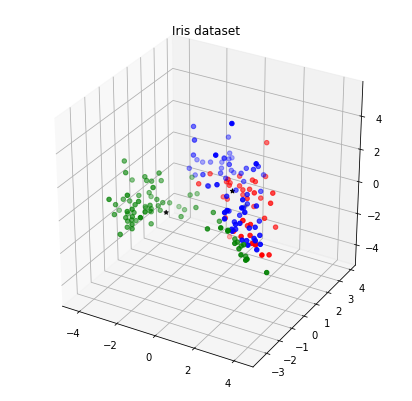

In [141]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster[0][:, 0], cluster[0][:, 1], cluster[0][:, 2], c='r')
ax.scatter(cluster[1][:, 0], cluster[1][:, 1], cluster[1][:, 2], c='g')
ax.scatter(cluster[2][:, 0], cluster[2][:, 1], cluster[2][:, 2], c='b')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='k', marker='*')

plt.title('Iris dataset')
plt.show()


In [34]:
file_handle = open('arcene_train.data')
arcene = np.array([list(map(int, file_handle.readline().strip().split(' '))) for _ in range(100)], dtype=np.float64)
arcene_std = StandardScaler().fit_transform(arcene)
pca = PCA(n_components=3)
pca.fit(arcene_std)
X = pca.transform(arcene_std)

In [38]:
cluster1, centroids1 = k_means(X, 2)

[[ 71.6743938  -10.40246299  14.83278791]
 [-48.19983781 -23.29887307   2.42938788]]


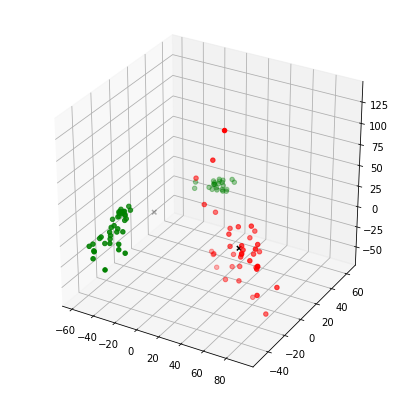

In [39]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster1[0][:, 0], cluster1[0][:, 1], cluster1[0][:, 2], c='r')
ax.scatter(cluster1[1][:, 0], cluster1[1][:, 1], cluster1[1][:, 2], c='g')
# ax.scatter(cluster1[2][:, 0], cluster1[2][:, 1], cluster1[2][:, 2], c='b')
ax.scatter(centroids1[:, 0], centroids1[:, 1], centroids1[:, 2], c='k', marker='x')
plt.show()

In [142]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=3, assign_labels="discretize", random_state=0).fit(arcene)

region1 = X[clustering.labels_ == 0]
region2 = X[clustering.labels_ == 1]
region3 = X[clustering.labels_ == 2]

/Users/sai/.virtualenvs/Oculus/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


IndexError: boolean index did not match indexed array along dimension 0; dimension is 178 but corresponding boolean dimension is 100

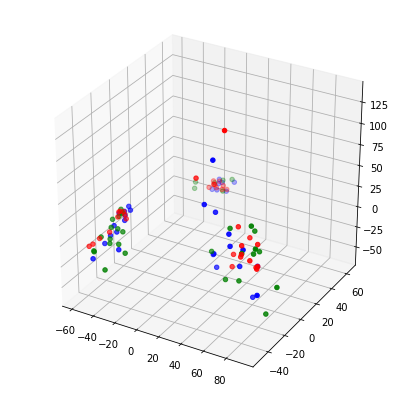

In [43]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(region1[:, 0], region1[:, 1], region1[:, 2], c='r')
ax.scatter(region2[:, 0], region2[:, 1], region2[:, 2], c='g')
ax.scatter(region3[:, 0], region3[:, 1], region3[:, 2], c='b')

# ax.scatter(centroids1[:, 0], centroids1[:, 1], centroids1[:, 2], c='k', marker='x')
plt.show()

My reults are better

Clustering validation, which evaluates the goodness of clustering results. **External clustering validation** and **internal clustering validation** are the two main categories of clustering validation.

The main difference is whether or not *external information is used for clustering validation*. Unlike external validation measures, which use external information not present in the data, internal validation measures only rely on information in the data. 

The internal measures evaluate the goodness of a clustering structure without respect to external information. 
Since external validation measures know the “true” cluster number in advance, they are mainly used for choosing an optimal clustering algorithm on a specific data set. 

On the other hand, internal validation measures can be used to choose the best clustering algorithm as well as the optimal cluster number without any additional information. 

In practice, external information such as class labels is often not available in many application scenarios. Therefore, in the situation that there is no external information available, internal validation measures are the only option for cluster validation.

### Interal measure

#### Compactness

It measures how closely related the objects in a cluster are. A group of measures evaluate cluster compactness based on variance. Lower variance indicates better compactness. 

#### Seperation

It measures how distinct or well-separated a cluster is from other clusters. For example, the pairwise distances between cluster centers or the pairwise minimum distances between objects in different clusters are widely
used as measures of separation. Also, measures based on
density are used in some indices.

In [44]:
def rmsstd(clusters):
    k = clusters.shape[0]
    ssd = np.zeros(clusters.shape)
    for i in range(k):
        mean = np.mean(clusters[i][0],axis=0)
        ssd[i] = np.sum((clusters[i][0] - mean)**2)
    numerator = np.sum(ssd)
    denominator = 0
    for i in range(k):
        for j in range(clusters[i][0].shape[1]):
            denominator += clusters[i][0].shape[0] - 1
    rmsstd_val = np.sqrt(numerator/denominator)
    return rmsstd_val

def rs(clusters):
    k = clusters.shape[0]
    ssd = np.zeros(clusters.shape)
    total_ssd = np.zeros(clusters.shape)
    
    means = []
    for i in range(k):
        mean = np.mean(clusters[i][0],axis=0)
        ssd[i] = np.sum((clusters[i][0] - mean)**2)
        means.append(list(mean))
    ss_w = np.sum(ssd)
    total_mean = np.mean(means, axis = 0)
    for i in range(k):
        total_ssd[i] = np.sum((clusters[i][0] - total_mean)**2)
    ss_t = np.sum(total_ssd)
    
    rs_val = (ss_t - ss_w) / ss_t
    return rs_val

In [129]:
file_handle = open('wine.data')
wine = np.array([list(map(float, file_handle.readline().strip().split(','))) for _ in range(178)], dtype=np.float64)
wine_labels = wine[:, 0] - 1
wine = wine[:, 1:]
wine_std = StandardScaler().fit_transform(wine)
pca = PCA(n_components=3)
pca.fit(wine_std)
X = pca.transform(wine_std)

[[-1.0481819  -3.51508969  1.16003857]
 [ 1.41038853 -0.69793432  0.47974303]
 [ 2.00985085 -1.24702946 -0.05729399]]


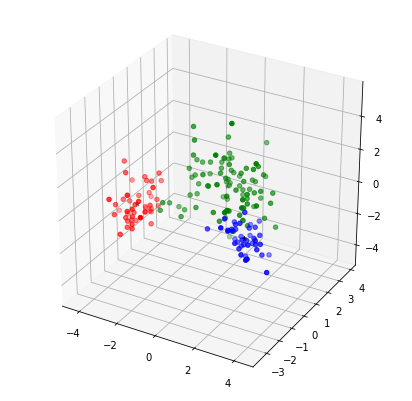

In [132]:
cluster1, centroids1, labels = k_means(X, 3)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster1[0][:, 0], cluster1[0][:, 1], cluster1[0][:, 2], c='r')
ax.scatter(cluster1[1][:, 0], cluster1[1][:, 1], cluster1[1][:, 2], c='g')
ax.scatter(cluster1[2][:, 0], cluster1[2][:, 1], cluster1[2][:, 2], c='b')
ax.scatter(centroids1[:, 0], centroids1[:, 1], centroids1[:, 2], c='k', marker='*')
plt.show()

In [133]:
print("Wine Dataset - RMSSTD: ", rmsstd(cluster1.reshape(cluster1.shape[0],1)))
print("WIne Dataset - RS: ", rs(cluster1.reshape(cluster1.shape[0],1)))

Wine Dataset - RMSSTD:  1.073730692382864
WIne Dataset - RS:  0.6158252251187529


In [98]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics.cluster import homogeneity_score
precision_score(y_true, y_pred, average=None) 
recall_score(y_true, y_pred, average=None)

def purity(y, k, class_count):
    sum = 0
    for i in range(k):
        counts = np.bincount(y[i])
        label = np.argmax(counts)
        max_occurances = counts[label]
        sum += min(class_count[i], max_occurances)
    return sum / np.sum(class_count)



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])